# importing necessary libraries

In [117]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Importing data set and assigning variable company

In [42]:
#url = 'https://raw.githubusercontent.com/Laxminarayen/Inceptz-Batch13-Analytics_and_Python/master/Hackathon/company.csv'
company = pd.read_csv('https://raw.githubusercontent.com/Laxminarayen/Inceptz-Batch13-Analytics_and_Python/master/Hackathon/company.csv',sep=',', index_col = 'Company')
company

,Age,Salary,Place,Country,Gender
Company,,,,,
TCS,20.0,NaN,Chennai,India,0
Infosys,30.0,NaN,Mumbai,India,0
TCS,35.0,2300.0,Calcutta,India,0
Infosys,40.0,3000.0,Delhi,India,0
TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...
TCS,33.0,9024.0,Calcutta,India,1
Infosys,22.0,8787.0,Calcutta,India,1
Infosys,44.0,4034.0,Delhi,India,1


# See the first 10 entries

In [8]:
company.head(10)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
5,Infosys,NaN,5000.0,Calcutta,India,0
6,TCS,NaN,6000.0,Chennai,India,1
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
9,CTS,45.0,9000.0,Delhi,India,0


# No of Male and females (0 describes female and 1 describes male), #From the below observation female count is more than male

In [43]:
company.groupby('Gender').describe()

Age                                                    Salary  \
        count       mean        std  min   25%   50%   75%   max  count   
Gender                                                                    
0       101.0  30.108911  11.334815  0.0  22.0  32.0  37.0  54.0   91.0   
1        29.0  31.793103  10.303880  0.0  23.0  33.0  40.0  46.0   33.0   

                                                                          
               mean          std     min     25%     50%     75%     max  
Gender                                                                    
0       4300.571429  2091.691252  1089.0  3000.0  4000.0  5495.0  9000.0  
1       8102.848485  1488.451610  4034.0  7084.0  8787.0  9024.0  9876.0

In [10]:
company['Gender'].value_counts()

0    115
1     33
Name: Gender, dtype: int64

# Grouping the data by company name

In [44]:
company.groupby('Company').describe()

Age                                           \
                          count       mean        std   min    25%   50%   
Company                                                                    
CTS                        36.0  32.194444  12.684793   0.0  22.00  33.5   
Congnizant                  2.0  21.500000   0.707107  21.0  21.25  21.5   
Infosys                    37.0  32.621622  12.919304   0.0  23.00  32.0   
Infosys Pvt Lmt             2.0  21.500000   0.707107  21.0  21.25  21.5   
TCS                        45.0  28.444444   8.564078   0.0  22.00  33.0   
Tata Consultancy Services   2.0  33.500000   3.535534  31.0  32.25  33.5   

                                       Salary               ...          \
                             75%   max  count         mean  ...     75%   
Company                                                     ...           
CTS                        44.00  46.0   25.0  4714.840000  ...  9000.0   
Congnizant                 21.75  22.0    2.0  2934.000000  ...  2934.0   
Infosys                    44.00  54.0   41.0  5191.317073  ...  7000.0   
Infosys Pvt Lmt            21.75  22.0    2.0  8202.000000  ...  8202.0   
TCS                        34.00  38.0   47.0  5493.319149  ...  7084.0   
Tata Consultancy Services  34.75  36.0    2.0  8345.000000  ...  8345.0   

                                  Gender                                      \
                              max  count      mean       std  min   25%  50%   
Company                                                                        
CTS                        9876.0   36.0  0.222222  0.421637  0.0  0.00  0.0   
Congnizant                 2934.0    2.0  0.000000  0.000000  0.0  0.00  0.0   
Infosys                    8943.0   45.0  0.155556  0.366529  0.0  0.00  0.0   
Infosys Pvt Lmt            8202.0    2.0  0.000000  0.000000  0.0  0.00  0.0   
TCS                        9024.0   53.0  0.301887  0.463470  0.0  0.00  0.0   
Tata Consultancy Services  8345.0    2.0  0.500000  0.707107  0.0  0.25  0.5   

                                      
                            75%  max  
Company                               
CTS                        0.00  1.0  
Congnizant                 0.00  0.0  
Infosys                    0.00  1.0  
Infosys Pvt Lmt            0.00  0.0  
TCS                        1.00  1.0  
Tata Consultancy Services  0.75  1.0  

[6 rows x 24 columns]

# Renaming different company names to respective company name

In [73]:
company.rename(index = {"Infosys Pvt Lmt": "Infosys", 
                     "Tata Consultancy Services":"TCS",
                       "Congnizant":"CTS"}, 
                                 inplace = True)
company.groupby('Company').describe()

Age                                                     Salary  \
        count       mean        std  min   25%   50%    75%   max  count   
Company                                                                    
CTS      38.0  31.631579  12.572860  0.0  22.0  33.0  43.75  46.0   27.0   
Infosys  39.0  32.051282  12.818467  0.0  22.0  32.0  43.50  54.0   43.0   
TCS      47.0  28.659574   8.455193  0.0  22.5  33.0  34.00  38.0   49.0   

                      ...                 Gender                           \
                mean  ...     75%     max  count      mean       std  min   
Company               ...                                                   
CTS      4582.925926  ...  9000.0  9876.0   38.0  0.210526  0.413155  0.0   
Infosys  5331.348837  ...  7327.0  8943.0   47.0  0.148936  0.359875  0.0   
TCS      5609.714286  ...  7084.0  9024.0   55.0  0.309091  0.466378  0.0   

                             
         25%  50%  75%  max  
Company                      
CTS      0.0  0.0  0.0  1.0  
Infosys  0.0  0.0  0.0  1.0  
TCS      0.0  0.0  1.0  1.0  

[3 rows x 24 columns]

# Removing NA values

In [99]:
#df = company.dropna()
#df.head(100)

In [79]:
df.groupby('Place').describe()

Age                                                      Salary  \
           count       mean        std   min   25%   50%    75%   max  count   
Place                                                                          
Bhopal       1.0  26.000000        NaN  26.0  26.0  26.0  26.00  26.0    1.0   
Calcutta    24.0  27.750000  12.119872   0.0  22.0  28.5  34.25  50.0   24.0   
Chennai      7.0  28.428571  15.544100   0.0  21.5  33.0  38.50  46.0    7.0   
Cochin      10.0  30.600000   9.131143  19.0  22.0  32.0  34.75  44.0   10.0   
Delhi       12.0  36.083333  13.520747   0.0  33.0  40.5  44.25  50.0   12.0   
Hyderabad    5.0  41.000000   8.631338  31.0  33.0  44.0  46.00  51.0    5.0   
Mumbai      25.0  27.760000  10.936483   0.0  21.0  23.0  33.00  54.0   25.0   
Nagpur       1.0  32.000000        NaN  32.0  32.0  32.0  32.00  32.0    1.0   
Noida        7.0  30.714286   5.589105  22.0  27.5  32.0  34.00  38.0    7.0   
Podicherry   3.0  22.333333  22.007574   0.0  11.5  23.0  33.50  44.0    3.0   
Pune         1.0  43.000000        NaN  43.0  43.0  43.0  43.00  43.0    1.0   

                         ...                  Gender                           \
                   mean  ...      75%     max  count      mean       std  min   
Place                    ...                                                    
Bhopal      7000.000000  ...  7000.00  7000.0    1.0  0.000000       NaN  0.0   
Calcutta    4974.916667  ...  8455.50  9284.0   24.0  0.291667  0.464306  0.0   
Chennai     6130.285714  ...  8572.50  9024.0    7.0  0.142857  0.377964  0.0   
Cochin      4771.700000  ...  6999.00  8202.0   10.0  0.100000  0.316228  0.0   
Delhi       4768.833333  ...  5836.25  9284.0   12.0  0.250000  0.452267  0.0   
Hyderabad   4259.400000  ...  4034.00  9000.0    5.0  0.200000  0.447214  0.0   
Mumbai      4674.440000  ...  6544.00  9876.0   25.0  0.200000  0.408248  0.0   
Nagpur      8000.000000  ...  8000.00  8000.0    1.0  0.000000       NaN  0.0   
Noida       4387.000000  ...  5820.50  8000.0    7.0  0.142857  0.377964  0.0   
Podicherry  4782.666667  ...  6157.00  9284.0    3.0  0.333333  0.577350  0.0   
Pune        9000.000000  ...  9000.00  9000.0    1.0  1.000000       NaN  1.0   

                                 
            25%  50%   75%  max  
Place                            
Bhopal      0.0  0.0  0.00  0.0  
Calcutta    0.0  0.0  1.00  1.0  
Chennai     0.0  0.0  0.00  1.0  
Cochin      0.0  0.0  0.00  1.0  
Delhi       0.0  0.0  0.25  1.0  
Hyderabad   0.0  0.0  0.00  1.0  
Mumbai      0.0  0.0  0.00  1.0  
Nagpur      0.0  0.0  0.00  0.0  
Noida       0.0  0.0  0.00  1.0  
Podicherry  0.0  0.0  0.50  1.0  
Pune        1.0  1.0  1.00  1.0  

[11 rows x 24 columns]

In [97]:
company.isna().sum()
#Country and Gender does not have null data

Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

# Removing Categorical values place and country

In [101]:
company.dropna(subset=['Place'],inplace=True)
company.dropna(subset=['Country'],inplace=True)
company.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, TCS to Infosys
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      118 non-null    float64
 1   Salary   111 non-null    float64
 2   Place    134 non-null    object 
 3   Country  134 non-null    object 
 4   Gender   134 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 6.3+ KB


# Imputing data with mean

In [109]:
#company['Age'].astype('float')
#company['Salary'].astype('float')

#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values = 'np.NaN', strategy = 'mean')
#imputer = imputer.fit(X[:,0:1])
#X[:, 0:1] = imputer.transform(X[:, 0:1])
#columns=df1.columns
#df_nonull.head(10)

ValueError: 'X' and 'missing_values' types are expected to be both numerical. Got X.dtype=float64 and  type(missing_values)=<class 'str'>.

In [111]:
company['Age']=company['Age'].fillna(company['Age'].mean())
company['Salary']=company['Salary'].fillna(company['Salary'].mean())
company.isna().sum()

Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

# Average Salary

In [115]:
company.groupby(['Company'])['Salary'].mean()

Company
CTS        4436.074389
Infosys    5211.805487
TCS        5363.190878
Name: Salary, dtype: float64

# Visualization Place wise salary projection

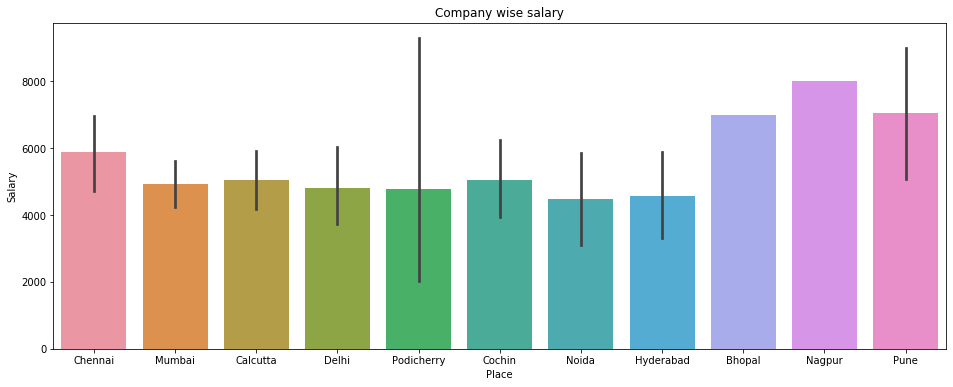

In [119]:
plt.figure(figsize=(16,6))
plt.title("Place wise salary")
sns.barplot(x=company['Place'],y=company['Salary'])

# Visualization Age wise salary projection

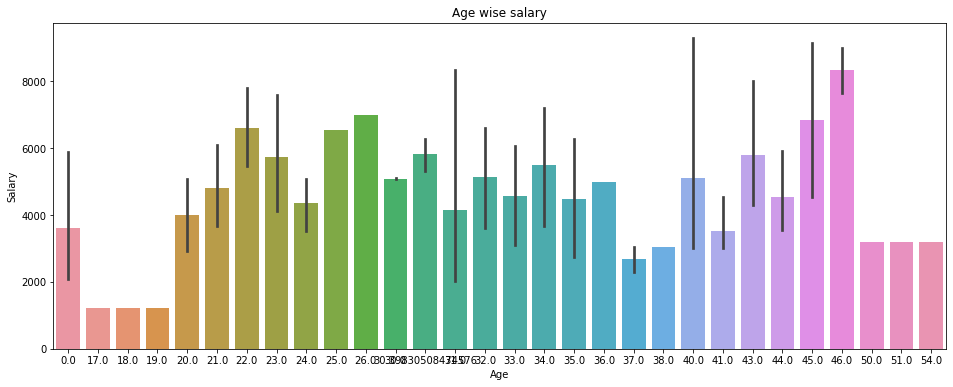

In [126]:
plt.figure(figsize=(16,6))
plt.title("Age wise salary")
sns.barplot(x=company['Age'],y=company['Salary'])

# Visualization Company wise salary projection

NameError: name 'index' is not defined

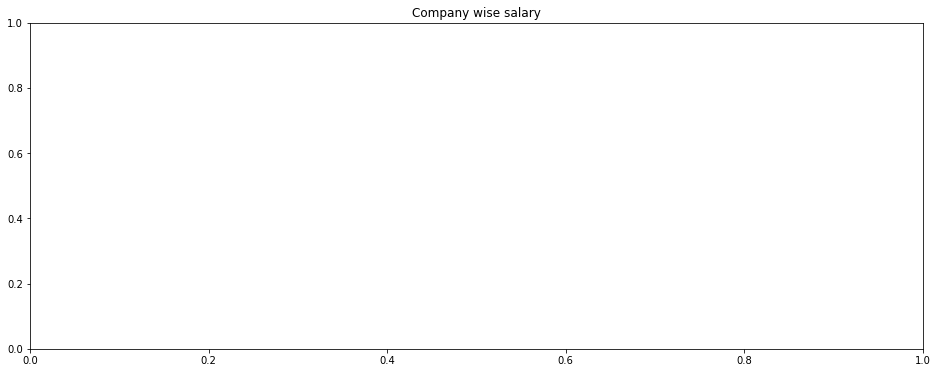

In [136]:
plt.figure(figsize=(16,6))
plt.title("Company wise salary")
#sns.barplot(x=Index_col['Company'],y=company['Salary'])
#sns.barplot(x=index['Company'],y=company['Salary'])
sns.barplot(x= index['0'],y=company['Salary'])